# Exercise.
Implement an End to End CNN Model for Image Classification Task.
Objective



# Task 1: Data Understanding and Visualization:

Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:


• Get the list of class directories from the train folder.

• Select one image randomly from each class.

• Display the images in a grid format with two rows using matplotlib.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
import tensorflow as tf

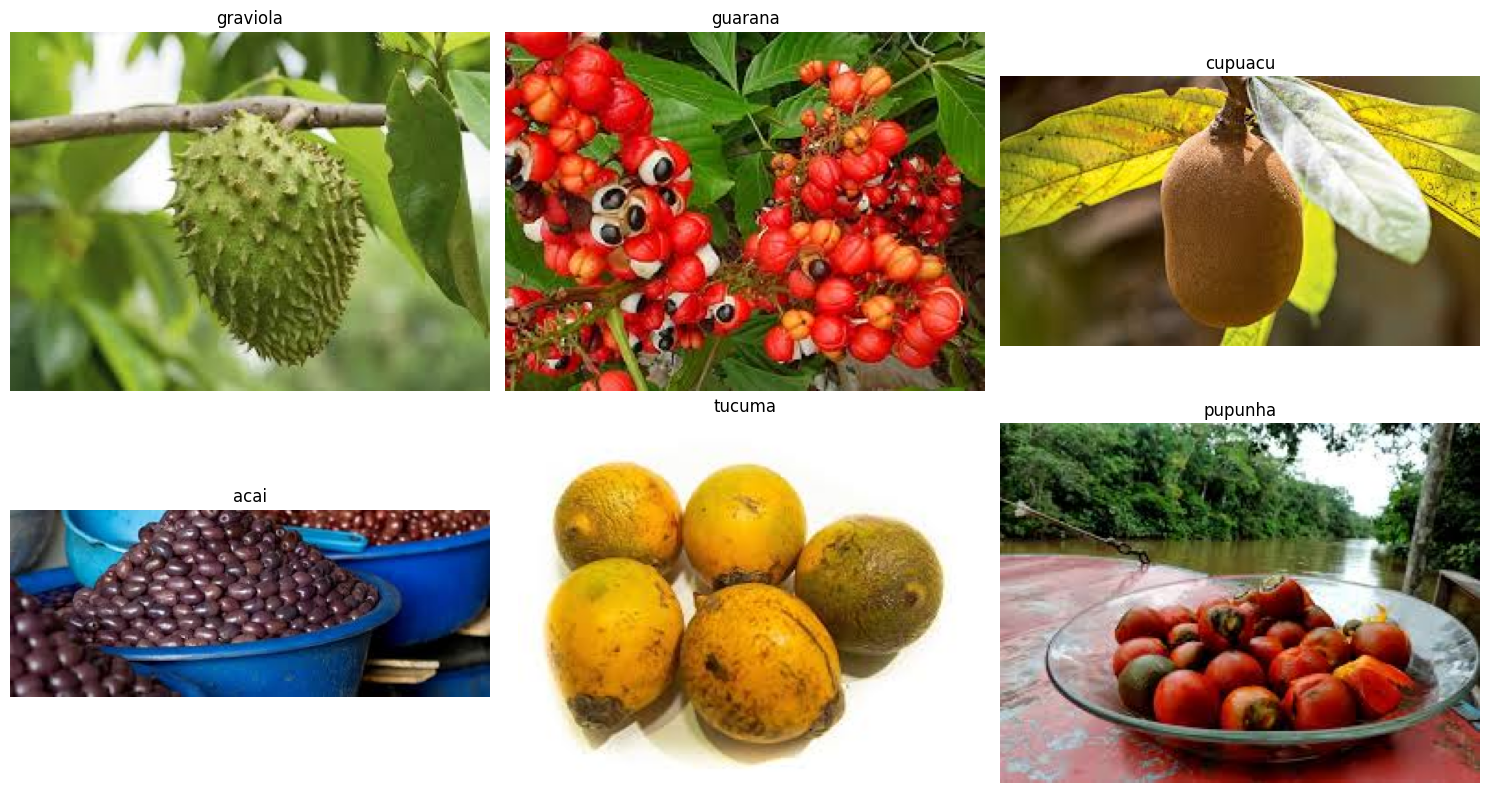

In [ ]:

# Directory containing training images
train_dir = '/content/drive/MyDrive/Colab Notebooks/AI and Machine Learning/Week-5/FruitinAmazon/train'

# Get list of subdirectories (each representing a class)
classes = os.listdir(train_dir)

# Collect images and labels
selected_images = []
selected_labels = []

for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)

    if len(image_files) > 0:
        image_path = os.path.join(class_dir, image_files[0])
        selected_images.append(image_path)
        selected_labels.append(class_name)

# Display images in a grid format with two rows
num_classes = len(selected_images)
n_cols = (num_classes + 1) // 2
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15, 8))
axes = axes.flatten()

for i, (img_path, label) in enumerate(zip(selected_images, selected_labels)):
    img = load_img(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”

In [ ]:
# Check for corrupted images and remove them
corrupted_images = []
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        try:
            img = Image.open(image_path)
            img.verify()  # Verify if image is valid
        except (IOError, SyntaxError) as e:
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

# Print list of corrupted images if any
if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [ ]:
import tensorflow as tf

# Image dimensions
img_height, img_width = 180, 180
# Batch size
batch_size = 32
# Validation split ratio
validation_split = 0.2

# Create training dataset with split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
)
# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
)

# Display the first batch from training dataset
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


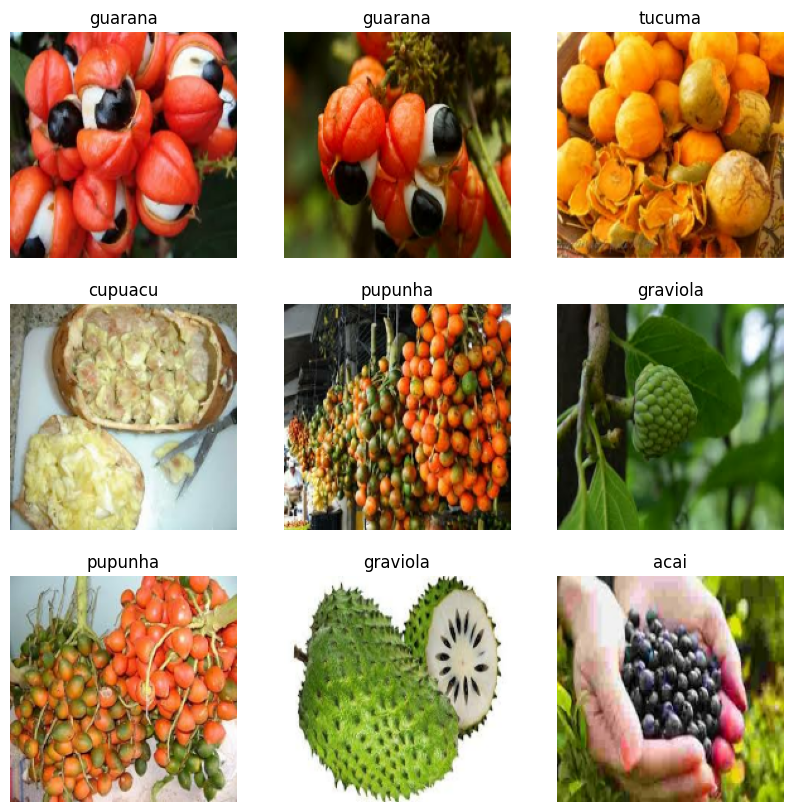

In [ ]:
# Display the first batch from training dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
    plt.show()

# Task 3 - Implement a CNN with

Follow the following Structure and Hyper - parameters:
# Convolutional Architecture:

# • Convolutional Layer 1:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

# • Activation Layer:

ReLU activation

# • Pooling Layer 1: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

# • Convolutional Layer 2:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

# • Activation Layer:
ReLU activation

# • Pooling Layer 2:
Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

# Fully Connected Network Architecture:

• Flatten Layer: Flatten the input coming from the convolutional layers

• Input Layer:

• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

• Output Layer:

– Number of Neurons: num classes (number of output classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def generate_model(input_shape, num_classes):
    model = tf.keras.Sequential([
      layers.Rescaling(1./255, input_shape=input_shape),
      # Convolutional layers
      layers.Conv2D(32, (3, 3),strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2)),

      # Flatten the output of the convolutional layers
      layers.Flatten(),

      # Dense layers for classification
      layers.Dense(64, activation='relu'),
      layers.Dense(num_classes, activation='softmax')
  ])

    return model

In [ ]:
input_shape = (img_height, img_width, 3)
num_classes = len(train_ds.class_names)


In [ ]:
model = generate_model(input_shape, num_classes)

In [ ]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,030 (910.27 KB)

 Trainable params: 233,030 (910.27 KB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model


Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).



# Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.

• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,030 (910.27 KB)

 Trainable params: 233,030 (910.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)


In [ ]:
# Train the model
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=16,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7400 - loss: 0.6805 - val_accuracy: 0.3333 - val_loss: 1.9385
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6910 - loss: 0.7012 - val_accuracy: 0.3889 - val_loss: 1.6189
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7205 - loss: 0.6475 - val_accuracy: 0.3889 - val_loss: 2.1790
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7350 - loss: 0.7190

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7352 - loss: 0.7147 - val_accuracy: 0.5556 - val_loss: 1.4934
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8620 - loss: 0.4618 - val_accuracy: 0.3889 - val_loss: 1.4251
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8090 - loss: 0.6029 - val_accuracy: 0.2778 - val_loss: 2.1622
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6823 - loss: 0.6542 - val_accuracy: 0.3889 - val_loss: 1.7829
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8345 - loss: 0.4341

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8377 - loss: 0.4283 - val_accuracy: 0.6111 - val_loss: 1.1681
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8641 - loss: 0.4083 - val_accuracy: 0.6111 - val_loss: 1.2180
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9271 - loss: 0.2752 - val_accuracy: 0.5000 - val_loss: 1.6594
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.8789 - loss: 0.3549 - val_accuracy: 0.4444 - val_loss: 1.6216
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9605 - loss: 0.1924 - val_accuracy: 0.6111 - val_loss: 1.4977
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9232 - loss: 0.2825 - val_accuracy: 0.5556 - val_loss: 1.4219


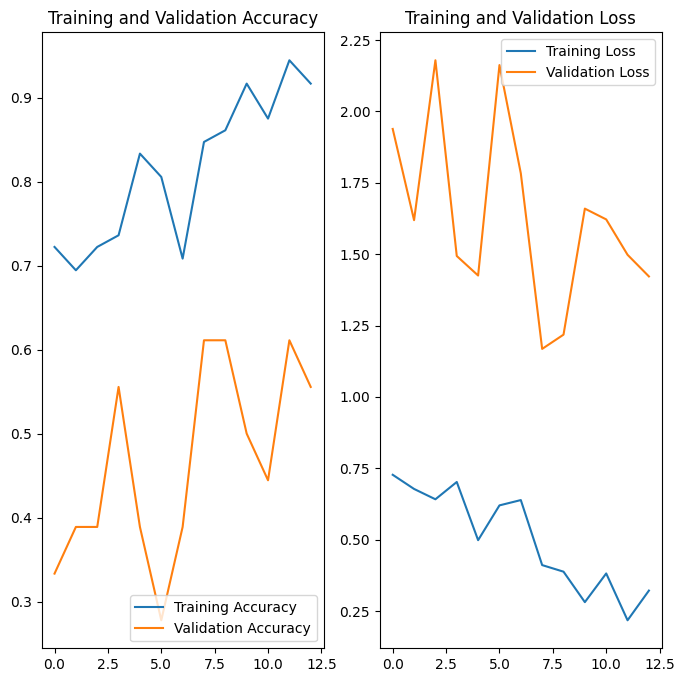

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # Use actual number of epochs run

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Task 5: Evaluate the Model

# Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step - accuracy: 0.6111 - loss: 1.1681
Validation Accuracy: 61.11%
Validation Loss: 1.1681
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


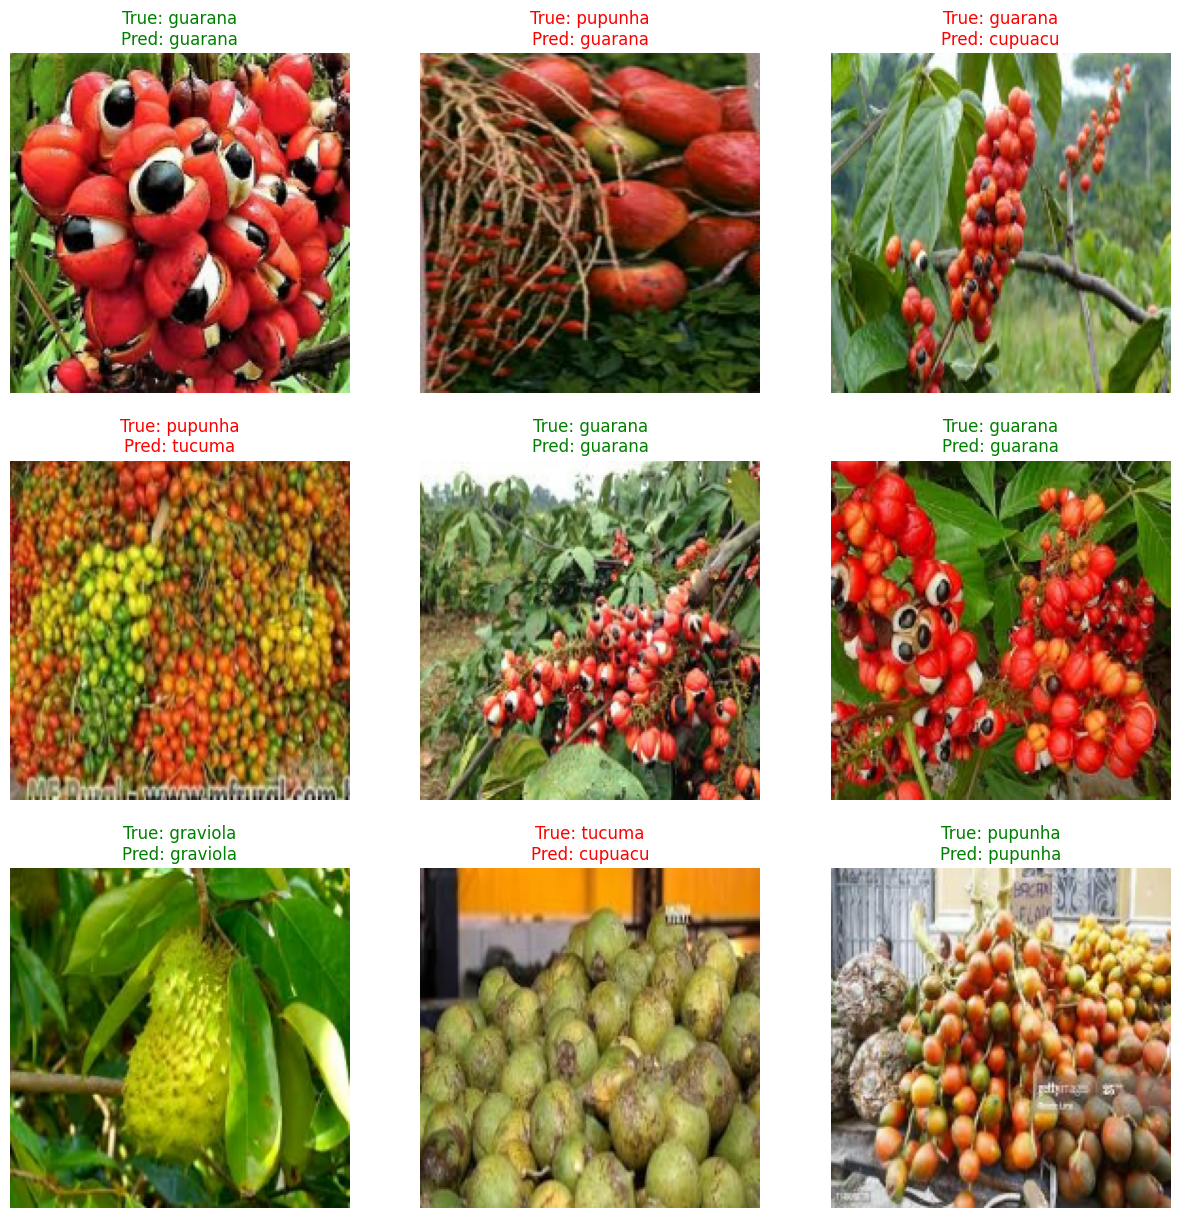

In [ ]:
# Loading the best saved model
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

# Evaluate the model on validation data
val_loss, val_acc = best_model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

# Make predictions on validation data
import numpy as np

# Get a batch of validation images
for images, labels in val_ds.take(1):
    # Make predictions
    predictions = best_model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Display some predictions
    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        true_label = val_ds.class_names[labels[i]]
        pred_label = val_ds.class_names[predicted_labels[i]]

        if true_label == pred_label:
            color = 'green'
        else:
            color = 'red'

        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis("off")
    plt.show()

# Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [ ]:
# Adding data augmentation to improve model generalization
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Create an improved model with augmentation and dropout
def create_improved_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        data_augmentation,
        layers.Rescaling(1./255, input_shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

improved_model = create_improved_model(input_shape, num_classes)

# Compile the improved model
improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the improved model
improved_history = improved_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)



Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1593 - loss: 1.8763 - val_accuracy: 0.0556 - val_loss: 1.8374
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2322 - loss: 1.8469 - val_accuracy: 0.1111 - val_loss: 1.7752
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2114 - loss: 1.7628 - val_accuracy: 0.1667 - val_loss: 1.7921
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1793 - loss: 1.8031 - val_accuracy: 0.1111 - val_loss: 1.8076
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1940 - loss: 1.8452 - val_accuracy: 0.1111 - val_loss: 1.8048
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3099 - loss: 1.6944 - val_accuracy: 0.1667 - val_loss: 1.7956
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2609 - loss: 1.7592 - val_accuracy: 0.2222 - val_loss: 1.7769
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3455 - loss: 1.6691 - val_accuracy: 0.2778 - val_loss: 1.7593
Epoch 9/50


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4193 - loss: 1.4265 - val_accuracy: 0.6667 - val_loss: 1.4663
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5490 - loss: 1.2447 - val_accuracy: 0.6667 - val_loss: 1.4332
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4588 - loss: 1.2533 - val_accuracy: 0.5000 - val_loss: 1.4134
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5256 - loss: 1.3233 - val_accuracy: 0.5000 - val_loss: 1.3996
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5347 - loss: 1.2307 - val_accuracy: 0.4444 - val_loss: 1.3942
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5647 - loss: 1.2307 - val_accuracy: 0.4444 - val_loss: 1.3654


# Task 7: Predictions and Classification Report

# Making Predictions

• Use model.predict() to make predictions on test images.
• Convert the model’s predicted probabilities to digit labels using np.argmax().
• Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [ ]:
# Save the final model in different formats

# 1. Save in the new Keras format (.keras)
best_model.save('fruit_classifier.keras')  # Recommended new format

# 2. Save in legacy HDF5 format (.h5) - optional
best_model.save('fruit_classifier.h5')  # Legacy format

# 3. Save in SavedModel format (for TensorFlow Serving)
# Use export() instead of save() for SavedModel format
best_model.export('fruit_classifier_savedmodel')

# 4. Convert to TensorFlow Lite (for mobile devices)
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

with open('fruit_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

# Create a function for making predictions on new images
def predict_fruit(image_path, model=best_model):
    img = tf.keras.utils.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    class_names = train_ds.class_names
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Test the prediction function with a new image
# Upload an image to Colab first
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    predicted_class, confidence = predict_fruit(filename)
    print(f"Image: {filename}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

Saved artifact at 'fruit_classifier_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  135088354443088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245629648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245628880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245627920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245628496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245626000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245628112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245630224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245625040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135088245628304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13

TypeError: 'NoneType' object is not subscriptable